### Regression Analysis with scikit-learn

#### This notebook provides an example of performing regression analysis using the scikit-learn machine learning package. We will use the Boston Housing Data Set which is one of the data sets included with the distribution of scikit-learn, so we will not need to import from an external source.

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [6]:
# Initially, we'll create a Pandas data frame to store the full data

bostonDF = pd. DataFrame(boston.data, columns = boston.feature_names)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bostonDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)

In [9]:
# The data portion of the dataset, containing the 13 predictor variables, is stored in a 2d Numpy array
print(boston.data)

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43]
 ...
 [  0.18   0.     9.69   0.     0.58   5.57  73.5    2.4    6.   391.    19.2  395.77  15.1 ]
 [  0.22   0.     9.69   0.     0.58   6.03  79.7    2.5    6.   391.    19.2  396.9   14.33]
 [  0.06   0.    11.93   0.     0.57   6.59  69.1    2.48   1.   273.    21.   391.99   9.67]
 [  0.05   0.    11.93   0.     0.57   6.12  76.7    2.

In [10]:
# The attribute MEDV (Median Values) is the target attribute (response variable fro regression)
print(boston.target[:20])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4 18.2 19.9 23.1 17.5 20.2 18.2]


#### In order to do multiple linear regression we generally need to add a column of 1s as the coefficient for x0. This will allow us to explicitly model the intercept as one of the model parameters (regression coefficients or weights).

In [11]:
X1 = np.array([np.concatenate((v,[1])) for v in boston.data])

In [12]:
# First 10 elements of the data
print(X1[:10])

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98   1.  ]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14   1.  ]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03   1.  ]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94   1.  ]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33   1.  ]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21   1.  ]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43   1.  ]
 [  0.14  12.5    7.87   0.     0.52   6.17  96.1    5.95   5.   311.    15.2  396.9   19.15   1.  ]
 [  0.21  12.5    7.87   0.     0.52   5.63 100.     6.08   5.   311.    15.2  386.63  29.93   1.  ]
 [  0.17  12.5    7.87   0.     0.52   6.    85.9    6.59   5.   311.    15.2  386.71  17.1

#### However, in the scikit-learn LinearRegression implementation, the above behavior is default (with the parameter fit_intercept set to True by default). Thus, we need not add a column of ones. We will use the data matrix (without a column of 1s) as our matrix if predictor variables, "X", and we will use the 1d array "y" as our target variable. I use "X" and "y" to be consistent with our notation used in other lecture material related to regression analysis. 

In [13]:
X = boston.data
y = boston.target

#### Let's look at an example of how to train a basic multiple linear regression model. First, we will split the data into training and test partitions. Then we will fit the regression model to the training data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Create linear regression object - here we'll use the default parameters
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Let's see predictions for the first 10 instances of the test data and compare to actual MEDV values

pred = linreg.predict(X_test)
for i in range(10):
    print("%2d \t %2.2f \t %2.2f" % (i, pred[i], y[i]))

 0 	 29.50 	 24.00
 1 	 29.29 	 21.60
 2 	 31.88 	 34.70
 3 	 20.71 	 33.40
 4 	 42.31 	 36.20
 5 	 26.95 	 28.70
 6 	 35.23 	 22.90
 7 	 15.60 	 27.10
 8 	 24.69 	 16.50
 9 	 14.18 	 18.90


#### We can also obtain the regression model coefficients (our w's). Note that each element of the vector w below is the weight of the corresponding variable in matrix X.

In [18]:
w = linreg.coef_
print(w)

[ -0.07   0.05   0.04   2.45 -16.31   3.81  -0.01  -1.43   0.27  -0.01  -0.91   0.01  -0.51]


In [19]:
# Let's put some names to the faces
for i in range(len(boston.feature_names)):
    print("%7s   %2.2f" % (boston.feature_names[i], linreg.coef_[i]))

   CRIM   -0.07
     ZN   0.05
  INDUS   0.04
   CHAS   2.45
    NOX   -16.31
     RM   3.81
    AGE   -0.01
    DIS   -1.43
    RAD   0.27
    TAX   -0.01
PTRATIO   -0.91
      B   0.01
  LSTAT   -0.51


In [20]:
# The following function can be used to plot the model coefficients for better visualization
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

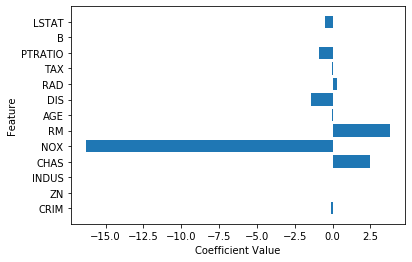

In [21]:
plot_coefficients(linreg, len(boston.feature_names), boston.feature_names)

In [22]:
# We can also directly obtain the regression intercept value:

print("Linear Regression Intercept: ", linreg.intercept_)

Linear Regression Intercept:  34.51326295210993


#### Let's now focus on how we can evaluate the accuracy of our model. In contrast to classification where we used metrics such as classification accuracy, precision, and recall as metrics, in the case of regression analysis we tend to use error metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE). For the purpose of this example, we will use RMSE as the evaluation metric.

In [23]:
# First, let's compute errors on all training instances

p_train = linreg.predict(X_train) # p_train is the array of predicted values

# Now we can constuct an array of errors
err_train = abs(p_train - y_train)

# Let's see the error values on the first 10 predictions
print(err_train[:10])

[ 9.97  1.91  0.97  0.25  3.94 10.74  7.36  0.7   2.42  4.48]


In [24]:
# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_train,err_train)

# Finally compute RMSE
rmse_train = np.sqrt(sum_sq_err/len(p_train))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  4.664877333262068


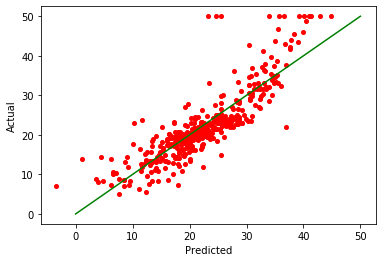

In [25]:
# Plot predicted against actual (in the training data)
%matplotlib inline
pl.plot(p_train, y_train,'ro', markersize=4)
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()


In [26]:
# Similarly we can compute RMSE on the test data

p_test = linreg.predict(X_test) # array of predicted values

# Now we can constuct an array of errors
err_test = abs(p_test - y_test)

# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_test,err_test)

# Finally compute RMSE
rmse_test = np.sqrt(sum_sq_err/len(p_test))
print("RMSE on Test Data: ", rmse_test)

RMSE on Test Data:  4.802752171835249


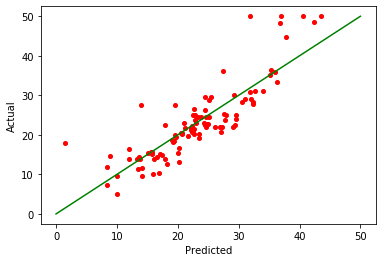

In [27]:
# Plot predicted against actual (in the test data)
%matplotlib inline
pl.plot(p_test, y_test,'ro', markersize=4)
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

#### We can also use scoring functions from <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">sklearn.metrics</a> to compute RMSE, MAE, or other relevant evaluation metrics. Please review the API reference for various classification and regression metrics. In the remaining part of this notebook, we will use this approach for computing RMSE instead of driving it directly.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print("RMSE on Test Data: ", rmse_test)

mae_test = mean_absolute_error(p_test, y_test)
print("MAE on Test Data: ", mae_test)

RMSE on Test Data:  4.802752171835249
MAE on Test Data:  3.3805186763356936


#### Typically, in the course of parameter optimization for the model, we compare the perfomance of the model on the training data (with a specific set of hyper-parameter values) to it's performance on cross-validation. The cross-validation is performed using partitions of the training data. Below is one approach to perform cross-validation using the KFold function in sklearn.model_selection.

In [29]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the training data matrix
    # y: the training target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.metrics import mean_squared_error
    
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=n, random_state=22) # specifying random_state ensures the same random
                                            # partitions are used across different runs
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train]) # fit model to the training partition in this fold
        p_test = model.predict(X[test]) # apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [30]:
# Computing the mean RMSE on 10-fold cross-validation

rmse_10cv = cross_validate(linreg, X_train, y_train, 10, verbose=True)

Fold  1 RMSE: 6.4416
Fold  2 RMSE: 4.8166
Fold  3 RMSE: 4.0964
Fold  4 RMSE: 5.2349
Fold  5 RMSE: 5.3031
Fold  6 RMSE: 4.2063
Fold  7 RMSE: 3.8142
Fold  8 RMSE: 3.8809
Fold  9 RMSE: 4.6494
Fold 10 RMSE: 6.4014


#### Another way to return cross-validation scores using sklearn's cross_val_score function. This is not as versetile as the KFold function because it does not give us control over what happens in each fold of the cross-validation. However, if we are only interested in computing model scores across different folds, this method simplifies the process. We used "cross_val_score" in previous examples on classification which by default returned classification accuracy values. In the case of regression, however, we do not want the estimator's default scoring function used. In order to use a specific evaluation metric such as mean square error, we will need to specify the "scoring" parameter. This is demonstrated below, but for the remainder of the notebook, we'll continue to use our own cross_validate() function above which uses the KFold function.

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cv_scores = cross_val_score(linreg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_scores)))

[6.44 4.82 4.1  5.23 5.3  4.21 3.81 3.88 4.65 6.4 ]


#### Now we can compare RMSE values for the training data and for cross-validation

In [33]:
# Computing the RMSE on the full training data

p_train = linreg.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

In [34]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6966
RMSE on 10-fold CV: 4.8845


#### Note that if error is high on both the training and on cross-validation, this would typically be an indication of underfitting. On the other hand, if there is a large gap between the two, with high error on cross-validation but low error on training, this would suggest that the model is overfitting. Of course, the comparison between these scores is more relevant when trying to optimize the model using different values of model hyper-parameters. We will look at this in more detail later.

#### Let's try regression with Ridge regularization:

In [35]:
from sklearn.linear_model import Ridge

# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(alpha=0.5)

# Train the model using the training set
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
# Computing the RMSE on the full training data

p_train = ridge.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE using 10-fold x-validation

rmse_10cv = cross_validate(ridge, X_train, y_train, 10, verbose=True)

method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Fold  1 RMSE: 6.4984
Fold  2 RMSE: 4.8010
Fold  3 RMSE: 4.1433
Fold  4 RMSE: 5.2164
Fold  5 RMSE: 5.3364
Fold  6 RMSE: 4.2120
Fold  7 RMSE: 3.8126
Fold  8 RMSE: 3.8481
Fold  9 RMSE: 4.5219
Fold 10 RMSE: 6.4515


Method: Ridge Regression
RMSE on training: 4.6723
RMSE on 10-fold CV: 4.8842


#### We can try different values of alpha and observe the impact on training and x-validation RMSE

In [37]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.001,4.0,100) # create an array of 50 evenly spaced numbers between 0.01 and 5.0
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p_train = ridge.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(ridge, X_train, y_train, 10)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap

0.001	 4.6649		 4.8844		 0.2196
0.041	 4.6650		 4.8835		 0.2185
0.082	 4.6652		 4.8829		 0.2176
0.122	 4.6656		 4.8824		 0.2168
0.163	 4.6661		 4.8822		 0.2161
0.203	 4.6667		 4.8821		 0.2154
0.243	 4.6673		 4.8821		 0.2148
0.284	 4.6680		 4.8823		 0.2143
0.324	 4.6688		 4.8825		 0.2137
0.365	 4.6696		 4.8828		 0.2133
0.405	 4.6704		 4.8832		 0.2128
0.445	 4.6712		 4.8836		 0.2124
0.486	 4.6720		 4.8840		 0.2120
0.526	 4.6728		 4.8845		 0.2116
0.567	 4.6737		 4.8849		 0.2113
0.607	 4.6745		 4.8854		 0.2109
0.647	 4.6754		 4.8860		 0.2106
0.688	 4.6762		 4.8865		 0.2102
0.728	 4.6771		 4.8870		 0.2099
0.768	 4.6779		 4.8875		 0.2096
0.809	 4.6787		 4.8881		 0.2093
0.849	 4.6795		 4.8886		 0.2091
0.890	 4.6803		 4.8891		 0.2088
0.930	 4.6811		 4.8897		 0.2085
0.970	 4.6819		 4.8902		 0.2082
1.011	 4.6827		 4.8907		 0.2080
1.051	 4.6835		 4.8912		 0.2077
1.092	 4.6842		 4.8917		 0.2075
1.132	 4.6849		 4.8922		 0.2072
1.172	 4.6857		 4.89

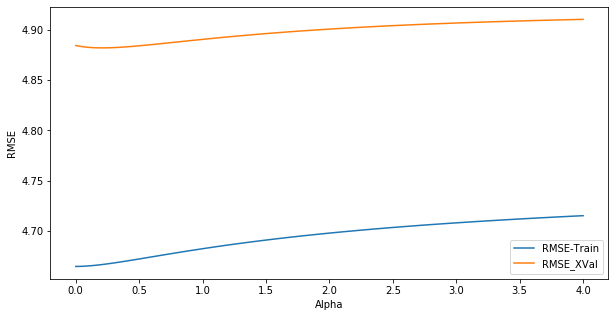

In [38]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

#### It looks like the gap between training and x-validation scores never changes that much in this case. So, the best ridge regularization coefficient maybe around 0.25 with lowest RMSE x-validation scores. Lower values may lead to overfitting while much larger values lead to underfitting. We can select this as our final hyper-parameter value and use it to train a new model on the full training data. This final model is then applies to the test data for the final validation.

In [39]:
# Create linear regression object with a ridge coefficient 0.25
ridge = Ridge(alpha=0.25)

# Train the model using the training set
ridge.fit(X_train, y_train)

p_train = ridge.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = ridge.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Ridge Regression
RMSE on training: 4.6674
RMSE on test data: 4.8200


#### Let's repeat this process with Lasso regression.

In [40]:
from sklearn.linear_model import Lasso

Lasso Regression


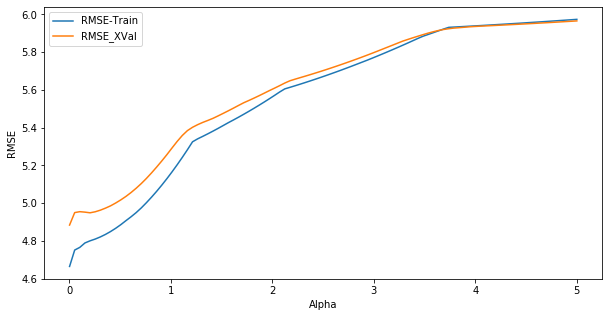

In [41]:
print('Lasso Regression')
# print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.001,5.0,100) # create an array of 50 evenly spaced numbers between 0.01 and 5.0
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(X_train, y_train)
    p_train = lasso.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(lasso, X_train, y_train, 10)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    # print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))
    
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [42]:
# Let's pick 0.3 for lasso regularization coefficient
lasso = Lasso(alpha=0.3)

# Train the model using the training set
lasso.fit(X_train, y_train)

p_train = lasso.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = lasso.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Lasso Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Lasso Regression
RMSE on training: 4.8203
RMSE on test data: 5.1103


#### Finally, let's try ElasticNet which combines Ridge and Lasso regularization with alpha as the regularization parameter and l1_ratio as the parameter controlling the weight proportions between lasso and ridge terms.

In [43]:
from sklearn.linear_model import ElasticNet

Elastic Net Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap

0.001	 4.6669		 4.8822		 0.2153
0.051	 4.7507		 4.9284		 0.1776
0.102	 4.7782		 4.9386		 0.1604
0.152	 4.8015		 4.9501		 0.1486
0.203	 4.8256		 4.9642		 0.1386
0.253	 4.8496		 4.9783		 0.1287
0.304	 4.8731		 4.9924		 0.1194
0.354	 4.8958		 5.0072		 0.1113
0.405	 4.9153		 5.0210		 0.1058
0.455	 4.9341		 5.0352		 0.1011
0.506	 4.9516		 5.0500		 0.0984
0.556	 4.9689		 5.0646		 0.0958
0.607	 4.9861		 5.0792		 0.0931
0.657	 5.0028		 5.0933		 0.0905
0.708	 5.0191		 5.1076		 0.0885
0.758	 5.0349		 5.1218		 0.0869
0.809	 5.0504		 5.1356		 0.0852
0.859	 5.0654		 5.1488		 0.0834
0.910	 5.0802		 5.1618		 0.0816
0.960	 5.0946		 5.1745		 0.0799
1.011	 5.1087		 5.1871		 0.0784
1.061	 5.1225		 5.1994		 0.0769
1.112	 5.1361		 5.2116		 0.0755
1.162	 5.1494		 5.2236		 0.0742
1.213	 5.1626		 5.2355		 0.0729
1.263	 5.1755		 5.2472		 0.0717
1.314	 5.1882		 5.2588		 0.0706
1.364	 5.2007		 5.2702		 0.0695
1.415	 5.2130		 5.2815		 0.0685
1.465	 5.2252	

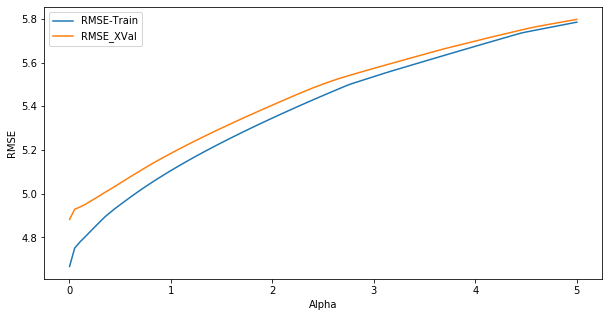

In [44]:
print('Elastic Net Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap\n')
alpha = np.linspace(.001,5.0,100) # create an array of 50 evenly spaced numbers between 0.01 and 5.0
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    elastic = ElasticNet(alpha=a, l1_ratio=0.5)
    
    # computing the RMSE on training data
    elastic.fit(X_train, y_train)
    p_train = elastic.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

    # Compute RMSE using 10-fold x-validation
    rmse_10cv = cross_validate(elastic, X_train, y_train, 10)
    
    gap = rmse_10cv - rmse_train
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv,gap))
    
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

#### Now let's try to do regression via Stochastic Gradient Descent. Please review the lecture notes on gradient descent optimization to see how the SGD regressor works.

In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

sgdreg = SGDRegressor(penalty='l2', alpha=0.001, eta0=0.005, max_iter=5000)

# Compute RMSE on training data
sgdreg.fit(X_train_s,y_train)
p_train = sgdreg.predict(X_train_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

#### Note that in order to find optimal hyper-parameter values, we will need to use the same cross-validation approach demonstrated earlier. You can do this on your own as an exercise. Later we will see how we can use grid search as a strategy to optimize multiple hyper-parameters at the same time.

In [47]:
# Compute RMSE on the set-aside test data

p_test = sgdreg.predict(X_test_s) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Stochastic Gradient Descent Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Stochastic Gradient Descent Regression
RMSE on training: 4.6782
RMSE on test data: 4.8549


#### Instead of Scikit-learn, let's  implement the closed form solution for linear regression to see what's going on underneath. This is based on the code from Ch. 8 of Machine Learning in action, using Numpy mat data type to pefrom matrix operations. 

In [48]:
def standRegres(X,y):
    xMat = np.mat(X); yMat = np.mat(y).T
    xTx = xMat.T*xMat # Note that this is matrix multiplication of X transpose by X
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [49]:
w = standRegres(X_train,y_train)

In [50]:
print(w)

[[-0.04]
 [ 0.05]
 [ 0.01]
 [ 2.56]
 [-2.47]
 [ 5.88]
 [-0.02]
 [-0.91]
 [ 0.14]
 [-0.01]
 [-0.41]
 [ 0.02]
 [-0.41]]


In [51]:
def ridgeRegres(X, y, alpha=0.2):
    xMat = np.mat(X); yMat = np.mat(y).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*alpha
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [52]:
w_ridge = ridgeRegres(X_train,y_train,0.5)
print(w_ridge)

[[-0.04]
 [ 0.05]
 [ 0.01]
 [ 2.51]
 [-1.82]
 [ 5.84]
 [-0.02]
 [-0.9 ]
 [ 0.14]
 [-0.01]
 [-0.41]
 [ 0.02]
 [-0.41]]


#### Now that we have the regression coefficients, we can compute the predictions:

In [53]:
xTestMat=np.mat(X_test)
yTestMat=np.mat(y_test)
pred_test = xTestMat*w_ridge

In [54]:
print(pred_test[0:10])

[[27.72]
 [28.03]
 [31.39]
 [20.17]
 [41.8 ]
 [25.88]
 [32.89]
 [17.01]
 [22.14]
 [14.4 ]]


In [55]:
# Let's compare to actual values in y_test
print(yTestMat.T[0:10])

[[25. ]
 [30.1]
 [30.8]
 [20.5]
 [48.5]
 [22.1]
 [35.1]
 [15.6]
 [22.7]
 [ 9.6]]


In [56]:
# You can "ravel" the 2d matrix above to get a 1d Numpy array more suitable for using in earlier functions.
print(pred_test.A.ravel())

[27.72 28.03 31.39 20.17 41.8  25.88 32.89 17.01 22.14 14.4  26.94 43.23 22.96 30.27 21.46 24.   26.08 21.14 15.06
 17.2   9.96 27.36 19.47 27.81  4.99 17.87 38.59 25.52 21.98 -2.62 31.78 12.35  9.62 27.28 39.28 23.29  8.9  41.28
 24.52 16.98 23.95 19.16  8.36 21.69 20.12 33.89 29.55 16.36 31.03 20.82 22.53 25.65 17.74 22.94 24.16 22.32 20.3
 21.97 21.82 21.21 25.36 26.07 27.92 21.46 22.19 26.04 31.5  35.26 27.6  25.   25.36 19.02 13.49 16.43 35.35 21.88
 26.86 27.57 24.   31.82 13.62 13.58  9.51 34.58 16.13 20.72 37.36 30.47 19.15 18.9  19.87 19.72 23.74  9.02 20.01
 12.63 21.33 24.06 15.14 13.92 21.96 27.69]


#### Model evaluation and cross validation can be performed as before.